## Lagrangian Mechanics Review

By: Eddy and Patrick

Overview:

As opposed to Newtonian mechanics: Energies are used to describe motion.

The equations of motion are then obtained by the Euler-Lagrange equation.

Has two core quantities: Action and the Lagrangian itself

The lagrangian $L \ [J]$: describes the state of motion for a particle through kinetic and potential energy.

Not taking into account friction: the kinetic and potential energy of an object is all that is required to predict the path of an object

$$L = T - V$$

where T is the kinetic energy and V is the potential energy. Intuitively, at any point in time, the object's motion will have different values of T and V, and different values of the lagrangian. Knowing the lagrangian at every time would thus allow one to determine how the trajectory would look like.

<br>

Action $S[f] \ [J\cdot s]$ - a functional that converts a function into a number: essetially assigning a value to each path that an object may take and define a path through space and time.

Intuitively, action of the full trajectory is the sum of lagrangian over time: $\sum L \cdot dt$


Here, Lagrangian describes the state (potential and kinetic energy) of the system / object at any given time

Principle of stationary action: based on nature, object will always take path of least action

Thus, in order to determine the equations of motion: the objective is to minimize the action, you can obtain a path of least action which represents the path a physical system will take through space and time. Action is defined as:

$$S = \int_{t_1}^{t_2} L(T, V) dt $$

<br>

To minimize action, it has been mathematically proven that the lagrangian that minimizes said action follows the Euler Lagrange Equation, which are equivalent to Newton’s second law.

Derivation is more complicated, recomended to explore this on your own. Key point is that the Lagrangian should satisfy the following equation for minimization of energy (general form).

$$\frac{d}{dt} \left( \frac{\delta L}{\delta \dot{q}} \right) - \frac{\delta L}{\delta q} = Q_i$$

where $q$ is the generalized position coordinate (ex: height of an object in free fall). As the system gets more complicated, you will have a higher number of differential equations  derivable from the above equation, due to the existance of more coordinates ($q$), hence the partial derivative term. $Q [N]$ represents the external excitation applied.

Generates the equations of motion of a system given a specific Lagrangian, akin to Newton’s second law with given force.



# Example Problem and Code

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import sympy as sp


Swinging Pendulum


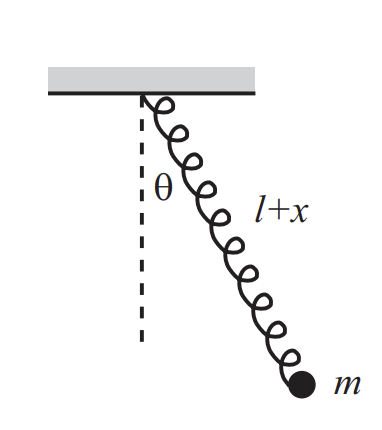

Assuming that we did not know kinematics, the Lagrangian approach may be used to determine the equations of motion for this object:


Step 1: Determine kinetic energies T and potential energies V.
<br>The kinetic energy may be broken up into the radial and tangential parts:
$$T = \frac{1}{2} m \left( \dot{x}^2 + (l+x)^2 \dot{\theta}^2 \right)$$
<br> The potential energy comes from both gravity and the spring. Setting the point of connection between the spring and wall as the reference point (because constant):
$$V = -mg(l+x)cos\theta + \frac{1}{2}kx^2 $$

Step 2: define the Lagrangian.

$$L = T - V = \frac{1}{2} m \left( \dot{x}^2 + (l+x)^2 \dot{\theta}^2 \right) +mg(l+x)cos\theta - \frac{1}{2}kx^2$$

Step 3: define and solve the Euler Lagrange equation with no external excitation, with respect to independant variables $x$ and $\theta$.

$$\frac{d}{dt} \left( \frac{\delta L}{\delta \dot{q}} \right) - \frac{\delta L}{\delta q} = 0, \text{where } q = x, \theta$$


with respect to $x$:
$$\frac{d}{dt} \left( \frac{\delta L}{\delta \dot{x}} \right) - \frac{\delta L}{\delta x} = 0$$
$$ \left[m\ddot{x}\right] - \left[m(l+x)\dot{\theta}^2 + mgcos\theta - kx \right] = 0 $$

with respect to $\theta$:
$$\frac{d}{dt} \left( \frac{\delta L}{\delta \dot{\theta}} \right) - \frac{\delta L}{\delta \theta} = 0$$

$$\left[\frac{d}{dt} \left(m(l+x)^2\dot{\theta} \right)\right] - \left[-mg(l+x)sin\theta \right] = 0$$

$$\left[m(l+x)^2\ddot{\theta} + 2m(l+x)\dot{x}\dot{\theta}\right] - \left[-mg(l+x)sin\theta \right] = 0$$

$$\left[m(l+x)\ddot{\theta} + 2m\dot{x}\dot{\theta}\right] - \left[-mgsin\theta \right] = 0$$

Step 4: Build the state space model. The state vector is:
$$
\mathbf{x} =
\begin{bmatrix}
x \\ \dot{x} \\ \theta \\ \dot{\theta}
\end{bmatrix}$$

The derivative of the state vector $\dot{\mathbf{x}} = f(\mathbf{x})$:
$$
\mathbf{f}(\mathbf{x}) =
\begin{bmatrix}
\dot{x} \\ (l+x)\dot{\theta}^2 + gcos\theta - \frac{k}{m}x \\ \dot{\theta} \\ \frac{-2 \dot{x}\dot{\theta} - g sin\theta}{l+x}
\end{bmatrix}
$$

At equilibrium point:
$$
\mathbf{x}_{eq} =
\begin{bmatrix}
x = 0 \\ \dot{x} = 0\\ \theta = 0 \\ \dot{\theta} = 0
\end{bmatrix}
$$



Take jacobian to linearize system around equilibrium point. The Jacobian matrix $\mathbf{J}(\mathbf{x})$ is given by:

$$
\mathbf{A}_{\text{eq}} = \mathbf{J}(\mathbf{x_{eq}}) =
\begin{bmatrix}
\frac{\partial f_1}{\partial x} & \frac{\partial f_1}{\partial \dot{x}} & \frac{\partial f_1}{\partial \theta} & \frac{\partial f_1}{\partial \dot{\theta}} \\
\frac{\partial f_2}{\partial x} & \frac{\partial f_2}{\partial \dot{x}} & \frac{\partial f_2}{\partial \theta} & \frac{\partial f_2}{\partial \dot{\theta}} \\
\frac{\partial f_3}{\partial x} & \frac{\partial f_3}{\partial \dot{x}} & \frac{\partial f_3}{\partial \theta} & \frac{\partial f_3}{\partial \dot{\theta}} \\
\frac{\partial f_4}{\partial x} & \frac{\partial f_4}{\partial \dot{x}} & \frac{\partial f_4}{\partial \theta} & \frac{\partial f_4}{\partial \dot{\theta}}
\end{bmatrix}
$$
<br> whereby the $A$ matrix is linearized around the equilibrium point.


$$
\mathbf{A}_{\text{eq}} =
\begin{bmatrix}
0 & 1 & 0 & 0 \\
-\frac{k}{m} + \dot{\theta}^2 & 0 & -g\sin\theta & 2(l + x)\dot{\theta} \\
0 & 0 & 0 & 1 \\
\frac{g\sin\theta}{(l + x)^2} & -\frac{2\dot{\theta}}{l + x} & -\frac{g\cos\theta}{l + x} & -\frac{2\dot{x}}{l + x}
\end{bmatrix}
$$

<br>Subbing in equlibrium points and parameter values (k=1, m=1, l=1):
$$
\mathbf{A}_{\text{eq}} =
\begin{bmatrix}
0 & 1 & 0 & 0 \\
-1 & 0 & 0 & 0 \\
0 & 0 & 0 & 1 \\
0 & 0 & -9.81 & 0
\end{bmatrix}
$$

Python implementation is shown below, see also: MATLAB implementation

In [ ]:
# symbols for the state variables and parameters
x, x_dot, theta, theta_dot = sp.symbols('x x_dot theta theta_dot')
g, m, l, k = sp.symbols('g m l k')

# define f(x), representing the derivative of the state vector x_vec
f = sp.Matrix([
    x_dot,  # f1 = \dot{x}
    (l + x)*theta_dot**2 + g*sp.cos(theta) - (k/m)*x,  # f2
    theta_dot,  # f3 = \dot{\theta}
    (-2*x_dot*theta_dot - g*sp.sin(theta)) / (l + x)  # f4
])

# state vector x
x_vec = sp.Matrix([x, x_dot, theta, theta_dot])

# jacobian matrix calculation
A_eq = f.jacobian(x_vec)

# equilibrium point @ (x = 0, x_dot = 0, theta = 0, theta_dot = 0)
equilibrium_point = {x: 0, x_dot: 0, theta: 0, theta_dot: 0, g: 9.81, m: 1, l: 1, k: 1}

# Substitute equilibrium point and parameter values into the Jacobian
A_eq_at_equilibrium = A_eq.subs(equilibrium_point)

sp.pprint(A_eq_at_equilibrium) # check that computed matrix same as calculated matrix


⎡0   1    0    0⎤
⎢               ⎥
⎢-1  0    0    0⎥
⎢               ⎥
⎢0   0    0    1⎥
⎢               ⎥
⎣0   0  -9.81  0⎦


The rest of the matrices are configured as follows:
<br> input matrix B, for input
$$
\mathbf{B} =
\begin{bmatrix}
0 \\ 0 \\ 0 \\ 0
\end{bmatrix}
$$

<br> output matrix C, for outputting desired items (up to you), for example, if we want to output $\theta$:
$$
\mathbf{C} =
\begin{bmatrix}
0 & 0 & 1 & 0
\end{bmatrix}
$$

<br> matrix D has no effect on outputting $\theta$:
$$
\mathbf{D} =
\begin{bmatrix}
0
\end{bmatrix}
$$

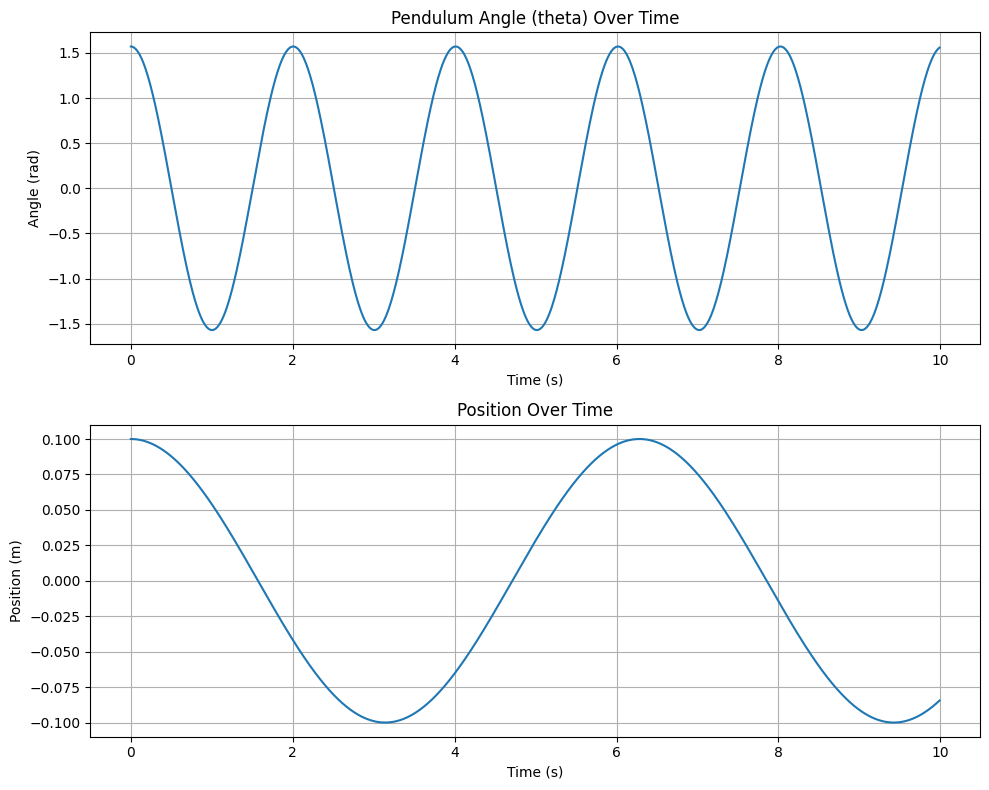

In [ ]:
# redefine system parameters for clarity
g = 9.81   # Gravity (m/s^2)
k = 1      # Spring constant (N/m)
m = 1      # Mass (kg)
l = 1      # Length (m)

# continuous-time state-space matrices (after linearization above)
'''
A_cont = np.array([
    [0, 1, 0, 0],
    [-1, 0, 0, 0],
    [0, 0, 0, 1],
    [0, 0, -g, 0]
])
# for reference
'''
A_cont = A_eq_at_equilibrium # from above linearization
B_cont = np.zeros((4, 1))  # No input
C = np.array([[0, 0, 1, 0]])  # Reading the angle theta, for example
D = np.array([[0]])

# discretization parameters
Ts = 0.01  # sampling time (s)

# discretize the w/ Zero-Order Hold (ZOH)
sys_cont = signal.StateSpace(A_cont, B_cont, C, D)
sys_disc = sys_cont.to_discrete(Ts, method='zoh')
A_disc, B_disc, C_disc, D_disc = sys_disc.A, sys_disc.B, sys_disc.C, sys_disc.D

# sim parameters
T_end = 10  # sim time range (s)
time = np.arange(0, T_end, Ts)  # time vector

# ICs: [position, velocity, angle (theta), angular velocity]
X0 = np.array([0.1, 0, np.pi/2, 0])

X = np.zeros((len(time), 4))  # matrix to store the states over time
X[0, :] = X0  # IC defined to matrix

# simulate system response
for i in range(1, len(time)):
    X[i, :] = A_disc @ X[i-1, :]

# Output (theta) over time
theta = X[:, 2]  # Angle (theta) is the third state

#Plot
plt.figure(figsize=(10, 8))


plt.subplot(2, 1, 1)
plt.plot(time, theta, label=r'$\theta$ (Angle)', linewidth=1.5)
plt.title('Pendulum Angle (theta) Over Time')
plt.xlabel('Time (s)')
plt.ylabel('Angle (rad)')
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(time, X[:, 0], label='Position', linewidth=1.5)
plt.title('Position Over Time')
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')
plt.grid(True)

plt.tight_layout()
plt.show()


See also: MATLAB code